In [1]:
# Step 1: Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

In [2]:
train_dir = r'E:\archive\Training Data\Training Data'   # Update with your path
valid_dir = r'E:\archive\Validation Data\Validation Data' # Update with your path
test_dir = r'E:\archive\Testing Data\Testing Data' 

In [3]:
# For Training Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



In [4]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')
valid_gen = valid_datagen.flow_from_directory(valid_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')

Found 484 images belonging to 4 classes.
Found 88 images belonging to 4 classes.


In [6]:
# Step 4: Load and preprocess data using ImageDataGenerator
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=16,  # Batch size for training
    class_mode='categorical',  # Multi-class classification
    shuffle=True  # Shuffle data
)

Found 484 images belonging to 4 classes.


In [13]:
valid_dir = r'E:\archive\Validation Data\Validation Data'
valid_gen = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=16,  # Batch size for validation
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # Don't shuffle for validation
)

Found 88 images belonging to 4 classes.


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for validation (with or without data augmentation)
valid_test_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling pixel values to [0, 1]

# Define the validation directory path
valid_dir = r'E:\archive\Validation Data\Validation Data'

# Create the validation generator
valid_gen = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=16,  # Batch size for validation
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # Don't shuffle for validation
)


Found 88 images belonging to 4 classes.


In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Define test_datagen

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=16,  # Batch size for testing
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # Don't shuffle for testing
)


Found 132 images belonging to 4 classes.


In [10]:
# Step 5: Define the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes: Elephant, Panda, Tiger, Zebra
])


c:\Users\atulm\Desktop\python\Python_NCCS\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Step 6: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Multi-class classification
              metrics=['accuracy'])


In [12]:
# Step 7: Train the Model
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,  # Reduce epochs to avoid system overload
    batch_size=16
)


c:\Users\atulm\Desktop\python\Python_NCCS\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.2483 - loss: 1.4594

c:\Users\atulm\Desktop\python\Python_NCCS\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 653ms/step - accuracy: 0.2492 - loss: 1.4577 - val_accuracy: 0.4432 - val_loss: 1.3537
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.4061 - loss: 1.3180 - val_accuracy: 0.5000 - val_loss: 1.2084
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.5390 - loss: 1.1335 - val_accuracy: 0.5568 - val_loss: 1.0719
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.5898 - loss: 1.0321 - val_accuracy: 0.6364 - val_loss: 0.9401
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.6544 - loss: 0.7988 - val_accuracy: 0.5568 - val_loss: 0.9603
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.7169 - loss: 0.7917 - val_accuracy: 0.5795 - val_loss: 0.9699
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.6951 - loss: 0.7371 - val_accuracy: 0.4773 - val_loss: 1.2649
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.6418 - loss: 0.8682 - val_accuracy: 0.6136 - v

In [46]:
# Step 8: Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test accuracy: {test_acc*100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.6157 - loss: 1.5199
Test accuracy: 64.39%


In [45]:
# Step 9: Save the Model (Optional)
model.save('animal_species_classifier.h5')

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image to predict
img_path = r'E:\archive\Testing Data\Testing Data\Elephant\Elephant-Test (1).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Panda\Panda-Test (5).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (18).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (20).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Zebra\Zebra-Test (7).jpeg'
# img_path= r'E:\archive\Training Data\Training Data\Tiger\Tiger (375).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Panda\Panda-Test (12).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (2).jpeg'
 # Update with the image you want to predict
img = image.load_img(img_path, target_size=(64, 64))  # Resize to the size used in training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image
img_array = img_array / 255.0

# Make the prediction
predictions = model.predict(img_array)
class_index = np.argmax(predictions, axis=1)[0]  # Get the class index with highest probability
class_labels = ['Elephant', 'Panda', 'Tiger', 'Zebra']
predicted_class = class_labels[class_index]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Class: Elephant


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Reduce Data Augmentation (simplified version)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Lower the rotation range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Step 2: Simplify Model Architecture (remove BatchNormalization for now)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Keep dropout regularization
    layers.Dense(4, activation='softmax')  # 4 classes: Elephant, Panda, Tiger, Zebra
])

# Step 3: Compile Model with a higher learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Increased learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 4: Apply EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Step 5: Train the Model with EarlyStopping
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=30,  # Keep epochs same
    batch_size=16,
    callbacks=[early_stopping]  # Add EarlyStopping callback
)

# Step 6: Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test accuracy: {test_acc*100:.2f}%")


Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.2842 - loss: 1.4719 - val_accuracy: 0.4545 - val_loss: 1.3557
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.3842 - loss: 1.3234 - val_accuracy: 0.4091 - val_loss: 1.1741
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.4932 - loss: 1.1909 - val_accuracy: 0.5227 - val_loss: 1.0716
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.5086 - loss: 1.1497 - val_accuracy: 0.5795 - val_loss: 0.9730
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.5608 - loss: 0.9760 - val_accuracy: 0.6023 - val_loss: 0.9289
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.6440 - loss: 0.8780 - val_accuracy: 0.4659 - val_loss: 1.1913
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.6419 - loss: 0.9086 - val_accuracy: 0.5568 - val_loss: 1.0707
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.6704 - loss: 0.7574 - val_accuracy: 0.

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image to predict
# img_path = r'E:\archive\Testing Data\Testing Data\Elephant\Elephant-Test (1).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Panda\Panda-Test (5).jpeg'
img_path= r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (18).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (20).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Zebra\Zebra-Test (7).jpeg'
# img_path= r'E:\archive\Training Data\Training Data\Tiger\Tiger (375).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Panda\Panda-Test (12).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (2).jpeg'
 # Update with the image you want to predict
img = image.load_img(img_path, target_size=(64, 64))  # Resize to the size used in training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image
img_array = img_array / 255.0

# Make the prediction
predictions = model.predict(img_array)
class_index = np.argmax(predictions, axis=1)[0]  # Get the class index with highest probability
class_labels = ['Elephant', 'Panda', 'Tiger', 'Zebra']
predicted_class = class_labels[class_index]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Predicted Class: Tiger


## MOre accuracy may be?

In [27]:
train_dir = r'E:\archive\Training Data\Training Data'   # Update with your path
valid_dir = r'E:\archive\Validation Data\Validation Data' # Update with your path
test_dir = r'E:\archive\Testing Data\Testing Data' 

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize the images
    rotation_range=30,      # Randomly rotate images
    width_shift_range=0.2,  # Shift images horizontally
    height_shift_range=0.2, # Shift images vertically
    shear_range=0.2,        # Randomly shear images
    zoom_range=0.2,         # Randomly zoom images
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill empty pixels after transformations
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Specify your training data path
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    valid_dir,  # Specify your validation data path
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 484 images belonging to 4 classes.
Found 88 images belonging to 4 classes.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(4, activation='softmax')  # Adjust the number of classes as per your data
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load a pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 32s 1us/step


In [31]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Use ReduceLROnPlateau to reduce learning rate when the validation loss stops improving
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[lr_reduction]
)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 123s 7s/step - accuracy: 0.4043 - loss: 1.3130 - val_accuracy: 0.5682 - val_loss: 1.0349 - learning_rate: 0.0010
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 115s 7s/step - accuracy: 0.6149 - loss: 0.9487 - val_accuracy: 0.6250 - val_loss: 0.8926 - learning_rate: 0.0010
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 112s 7s/step - accuracy: 0.7515 - loss: 0.6940 - val_accuracy: 0.6364 - val_loss: 0.8307 - learning_rate: 0.0010
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 115s 8s/step - accuracy: 0.7657 - loss: 0.5980 - val_accuracy: 0.6591 - val_loss: 0.7816 - learning_rate: 0.0010
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 110s 7s/step - accuracy: 0.8138 - loss: 0.5877 - val_accuracy: 0.6477 - val_loss: 0.7784 - learning_rate: 0.0010
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.8359 - loss: 0.4754 - val_accuracy: 0.6932 - val_loss: 0.6791 - learning_rate: 0.0010
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 116s 7s/step - accuracy: 0.7950 - loss: 0.4914 - val_acc

In [42]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = r'E:\archive\Training Data\Training Data'   # Update with your path
valid_dir = r'E:\archive\Validation Data\Validation Data' # Update with your path
test_dir = r'E:\archive\Testing Data\Testing Data' 
# Set up ImageDataGenerator for training (including augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize images
    rotation_range=20,     # Random rotation
    width_shift_range=0.2, # Random width shift
    height_shift_range=0.2,# Random height shift
    shear_range=0.2,       # Random shear
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True   # Random horizontal flip
)

# Set up ImageDataGenerator for validation (just normalization)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create the train and validation generators from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Replace with your train data directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    valid_dir,  # Replace with your validation data directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)


Found 484 images belonging to 4 classes.


Found 88 images belonging to 4 classes.


In [45]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # You can change the number of epochs based on your requirement
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.4072 - loss: 30.9357 - val_accuracy: 0.1875 - val_loss: 5.3097
Epoch 2/10
 1/15 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6250 - loss: 18.7551

c:\Users\atulm\Desktop\python\Python_NCCS\myenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6250 - loss: 18.7551 - val_accuracy: 0.3281 - val_loss: 3.4819
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5145 - loss: 26.6392 - val_accuracy: 0.4531 - val_loss: 2.5077
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6562 - loss: 10.3871 - val_accuracy: 0.4062 - val_loss: 3.1183
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5901 - loss: 13.3756 - val_accuracy: 0.4375 - val_loss: 6.2767
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.6562 - loss: 10.9074 - val_accuracy: 0.3750 - val_loss: 6.3414
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.6420 - loss: 7.9991 - val_accuracy: 0.4375 - val_loss: 8.5843
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5938 - loss: 7.1172 - val_accuracy: 0.4375 - val_loss: 8.6602
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5940 - loss: 6.2163 - val_accuracy: 0.4062 - val_loss: 

In [46]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.3903 - loss: 14.5346
Validation Loss: 14.3380
Validation Accuracy: 39.77%


In [48]:
# Evaluate the model on the validation set (or test set)
val_loss, val_accuracy = model.evaluate(val_generator, steps=val_generator.samples // val_generator.batch_size)

# Print the overall accuracy
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - accuracy: 0.4375 - loss: 12.4956
Validation Accuracy: 42.19%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
model.save('my_model.h5')  # Replace 'my_model.h5' with your desired file name and path
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model('my_model.h5')  # Replace with the actual file path where you saved the model



In [59]:
# Assuming test data is available in a directory
test_dir = r'E:\archive\Testing Data\Testing Data' 
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
   test_dir,  # Replace with your test data directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 132 images belonging to 4 classes.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.3458 - loss: 11.4858
Test Accuracy: 35.94%


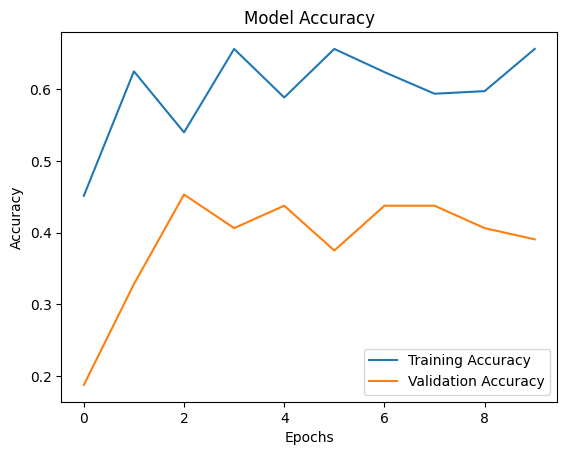

In [52]:
import matplotlib.pyplot as plt

# Plot the accuracy for training and validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


In [62]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess an image for prediction
# img_path = r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (18).jpeg' # Replace with the path to your test image
# img_path= r'E:\archive\Testing Data\Testing Data\Panda\Panda-Test (5).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (18).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (20).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Zebra\Zebra-Test (7).jpeg'
# img_path= r'E:\archive\Training Data\Training Data\Tiger\Tiger (375).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Panda\Panda-Test (12).jpeg'
img_path= r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (2).jpeg'
img = image.load_img(img_path, target_size=(150, 150))  # Resize to match input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Predict the class
predictions = model.predict(img_array)
class_index = np.argmax(predictions, axis=1)[0]

# Define class labels
class_labels = ['Elephant', 'Panda', 'Tiger', 'Zebra']
predicted_class = class_labels[class_index]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted Class: Panda


In [68]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image you want to predict
# img_path = r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (18).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Panda\Panda-Test (5).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (18).jpeg'
img_path= r'E:\archive\Testing Data\Testing Data\Zebra\Zebra-Test (7).jpeg'
# Resize the image to the target size used during training (150, 150, 3)
img = image.load_img(img_path, target_size=(150, 150))  # Resize to (150, 150)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image (same normalization as during training)
img_array = img_array / 255.0

# Make the prediction
predictions = model.predict(img_array)
class_index = np.argmax(predictions, axis=1)[0]  # Get the class index with the highest probability
class_labels = ['Elephant', 'Panda', 'Tiger', 'Zebra']
predicted_class = class_labels[class_index]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Predicted Class: Panda


In [70]:
print(f"Predicted Probabilities: {predictions}")


Predicted Probabilities: [[1.2405001e-16 1.0000000e+00 2.3477181e-10 1.7385918e-12]]


In [71]:
from sklearn.metrics import confusion_matrix
y_true = []  # Actual class labels from test set
y_pred = []  # Predicted class labels

# Populate y_true and y_pred from test data and predictions

print(confusion_matrix(y_true, y_pred))


[]


In [69]:
# Make the prediction
predictions = model.predict(img_array)

# Print out probabilities for each class
print(f"Predicted Probabilities: {predictions}")

# Get the class index with the highest probability
class_index = np.argmax(predictions, axis=1)[0]

# Map the class index to class name
class_labels = ['Elephant', 'Panda', 'Tiger', 'Zebra']
predicted_class = class_labels[class_index]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted Probabilities: [[1.2405001e-16 1.0000000e+00 2.3477181e-10 1.7385918e-12]]
Predicted Class: Panda


### Animal Classification


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:


# Set up data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,         # Randomly rotate images
    width_shift_range=0.2,     # Randomly shift images horizontally
    height_shift_range=0.2,    # Randomly shift images vertically
    shear_range=0.2,           # Randomly shear images
    zoom_range=0.2,            # Randomly zoom images
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill missing pixels after transformations
)

# Set up data augmentation for testing images (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)


In [3]:

# Path to the training data and test data directories
train_dir = r'E:\archive\Training Data\Training Data'  # Replace with your training data path
test_dir = r'E:\archive\Testing Data\Testing Data'  # Replace with your test data path

# Load training data with augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

# Load testing data (without augmentation, just rescaling)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 440 images belonging to 4 classes.
Found 132 images belonging to 4 classes.


In [4]:

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes for classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\atulm\Desktop\python\Python_NCCS\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

# Train the model using data augmentation
history = model.fit(
    train_generator,
    epochs=50,  # Adjust number of epochs as needed
    validation_data=test_generator
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


c:\Users\atulm\Desktop\python\Python_NCCS\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2244 - loss: 6.4829

c:\Users\atulm\Desktop\python\Python_NCCS\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.2270 - loss: 6.3306 - val_accuracy: 0.2576 - val_loss: 1.3519
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3397 - loss: 1.2924 - val_accuracy: 0.4394 - val_loss: 1.3577
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5799 - loss: 1.0460 - val_accuracy: 0.4773 - val_loss: 1.5851
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6176 - loss: 0.9309 - val_accuracy: 0.4773 - val_loss: 1.8434
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6650 - loss: 0.8064 - val_accuracy: 0.6894 - val_loss: 1.0603
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7045 - loss: 0.7605 - val_accuracy: 0.6439 - val_loss: 1.2285
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7273 - loss: 0.6723 - val_accuracy: 0.6288 - val_loss: 1.3754
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7714 - loss: 0.6233 - val_accuracy: 0.6364 - val_loss: 1.2965
Epo

In [6]:
# Save the trained model
model.save('my_model_final.h5')  # You can specify your preferred path and filename


In [7]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,467,854 (486.25 MB)

 Trainable params: 42,489,284 (162.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84,978,570 (324.17 MB)

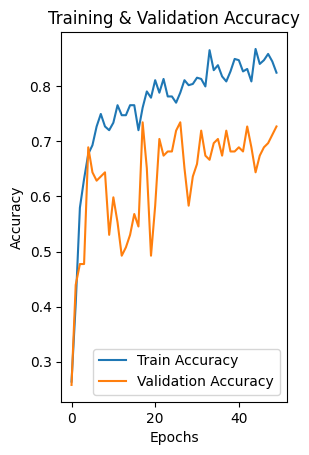

In [9]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

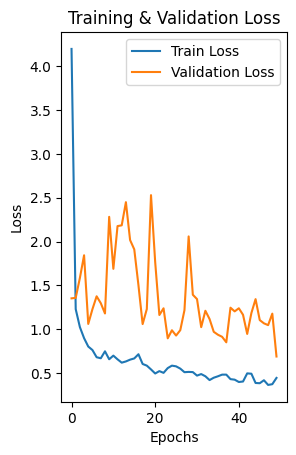

In [10]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = r'E:\archive\Testing Data\Testing Data'  # Replace with your actual path

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important! Keeps labels aligned with filenames
)


Found 132 images belonging to 4 classes.


In [12]:
from tensorflow.keras.models import load_model

model = load_model('my_model_final.h5')  # Load the trained model


In [13]:
# Get true labels from the test generator
y_true = test_generator.classes  # True labels from directory structure

# Get class labels (actual class names)
class_labels = list(test_generator.class_indices.keys())

# Get predicted labels (probabilities)
y_pred_probs = model.predict(test_generator)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices


c:\Users\atulm\Desktop\python\Python_NCCS\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 538ms/step


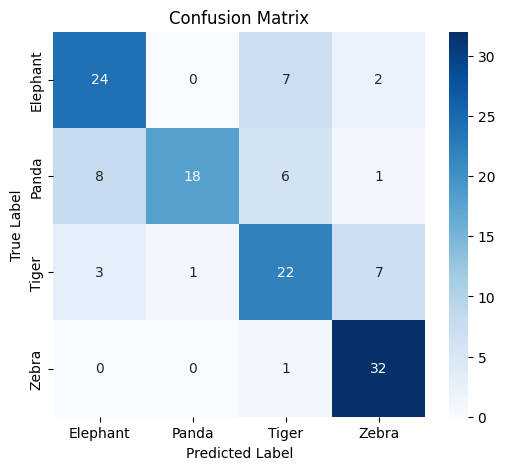

In [14]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [15]:
# Print classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

    Elephant       0.69      0.73      0.71        33
       Panda       0.95      0.55      0.69        33
       Tiger       0.61      0.67      0.64        33
       Zebra       0.76      0.97      0.85        33

    accuracy                           0.73       132
   macro avg       0.75      0.73      0.72       132
weighted avg       0.75      0.73      0.72       132



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


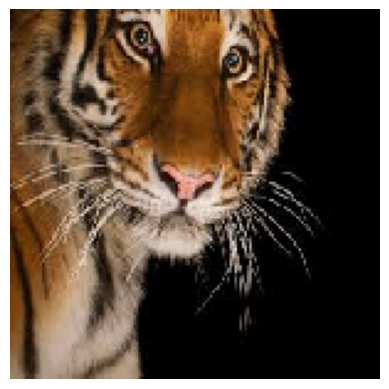

Predicted Class: Tiger


In [15]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
img_path = r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (18).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Panda\Panda-Test (5).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (18).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Zebra\Zebra-Test (7).jpeg'
# img_path= r'E:\archive\Testing Data\Testing Data\Elephant\Elephant-Test (192).jpeg'
# img_path= r'C:\Users\atulm\Downloads\tiger.png'
# img_path= r'C:\Users\atulm\Downloads\panda.png'
# img_path= r'C:\Users\atulm\Downloads\ele.png'
# img_path= r'E:\archive\Testing Data\Testing Data\Elephant\Elephant-Test (307).jpeg'
# img_path= r'C:\Users\atulm\Pictures\Screenshots\Screenshot (8).png'

# img_path = r'E:\path\to\your\image.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(150, 150))  # Resize to match model input size
img_array = image.img_to_array(img)  # Convert image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale the image

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the class with the highest probability

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Print the predicted class
class_names = train_generator.class_indices  # Get the class names
class_names = {v: k for k, v in class_names.items()}  # Reverse the dictionary
print(f"Predicted Class: {class_names[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


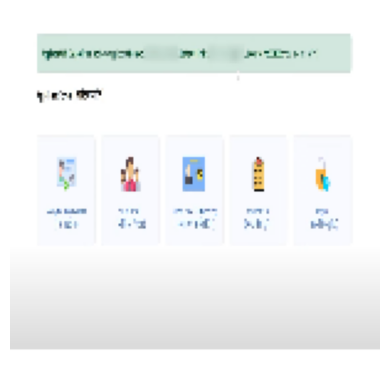

Predicted Class: ❓ Unknown (Confidence: 40.92%)


In [17]:

def predict_image(img_path, model, train_generator, threshold=0.7):
    """ Predicts the class of an image with a confidence threshold """

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  
    confidence = np.max(predictions)  

    # Get class names
    class_names = train_generator.class_indices  
    class_names = {v: k for k, v in class_names.items()}  

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Classify as "Unknown" if confidence is low
    if confidence < threshold:
        print(f"Predicted Class: ❓ Unknown (Confidence: {confidence * 100:.2f}%)")
    else:
        print(f"Predicted Class: ✅ {class_names[predicted_class[0]]} (Confidence: {confidence * 100:.2f}%)")


# ----------------------------------------------
# 📌 TESTING WITH AN IMAGE
# ----------------------------------------------
# img_path = r'E:\archive\Testing Data\Testing Data\Tiger\Tiger-Test (18).jpeg'
img_path = r'C:\Users\atulm\Downloads\uii1.png'
predict_image(img_path, model, train_generator)

In [ ]:
!pip install numpy

In [12]:
!pip install flask tensorflow keras pillow numpy


  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached flask-3.1.0-py3-none-any.whl (102 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_model_final.h5')

# Use the model to make predictions on new images as shown above
